<a href="https://colab.research.google.com/github/VishalShende358/Library-managment-system/blob/master/Medibuddy_Insurance_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project: Medibuddy Insurance Project**

In [46]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df=pd.read_excel('/content/Medibuddy insurance data .xlsx')

In [4]:
df.head()

,Policy no.,children,smoker,region
0,PLC157006,0,no,southwest
1,PLC157033,1,no,southwest
2,PLC157060,0,no,southwest
3,PLC157087,1,no,southwest
4,PLC157186,5,no,southwest


In [5]:
df2=pd.read_excel('/content/Medibuddy Insurance Data Price (1) (2).xlsx')

In [7]:
df2.head()

,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19,female,27.900,16884.92400
1,PLC156907,18,male,33.770,1725.55230
2,PLC156916,28,male,33.000,4449.46200
3,PLC156925,33,male,22.705,21984.47061
4,PLC156934,32,male,28.880,3866.85520


In [8]:
merge=pd.merge(df,df2,on='Policy no.',how='outer')

In [9]:
merge.head()


,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
0,PLC157006,0,no,southwest,23,male,34.4,1826.843
1,PLC157033,1,no,southwest,19,male,24.6,1837.237
2,PLC157060,0,no,southwest,56,male,40.3,10602.385
3,PLC157087,1,no,southwest,30,female,32.4,4149.736
4,PLC157186,5,no,southwest,19,female,28.6,4687.797


In [10]:
merge.shape

(1338, 8)

From Medibuddy Insurance dataset there are 1338 rows and 8 columns are present in dataset.



In [11]:
merge.isnull().sum()

,0
Policy no.,0
children,0
smoker,0
region,0
age,0
sex,0
bmi,0
charges in INR,0


In [12]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1338 non-null   object 
 1   children        1338 non-null   int64  
 2   smoker          1338 non-null   object 
 3   region          1338 non-null   object 
 4   age             1338 non-null   int64  
 5   sex             1338 non-null   object 
 6   bmi             1338 non-null   float64
 7   charges in INR  1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [14]:
merge.describe().T

,count,mean,std,min,25%,50%,75%,max
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
charges in INR,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


 **Let's analyze the data and extract some insights.**

1. Data Shape and Structure:
    - The merged dataset contains 1338 rows and 8 columns.
    - This suggests a reasonable amount of data for analysis.

2. Missing Values:
    - The `isnull().sum()` output shows the number of missing values in each column.
    - We need to handle these missing values before proceeding with further analysis.
    - We can either impute them (replace with a suitable value) or remove the rows/columns with missing values, depending on the context.

 3. Data Types:
    - The `.info()` method provides information about the data types of each column.
    - We need to ensure that the data types are appropriate for the analysis.
    - For example, if a column represents a categorical variable, it should be of type 'object' or 'category'.

 4. Descriptive Statistics:
    - The `.describe().T` output provides summary statistics for numerical columns.
    - We can analyze the mean, standard deviation, minimum, maximum, and quartiles of these columns.
    - This can help us understand the distribution of the data and identify potential outliers.

 5. Potential Insights (based on the available code):
    - We can explore the relationship between different variables, such as the relationship between 'Age' and 'Premium'.
    - We can analyze the distribution of 'Premium' across different regions or genders.
    - We can identify the most common diseases or health conditions covered by the insurance policies.
    - We can analyze the distribution of policy prices across different types of policies.

 Note: These are just preliminary insights based on the code provided.
- We need to perform further analysis and visualization to extract more meaningful insights.

In [16]:
merge['sex'].value_counts()

,count
sex,
male,676
female,662


In [23]:
sex_df=merge.groupby('sex')['charges in INR'].mean()

In [24]:
region=merge.groupby('region')['charges in INR'].mean()
region

,charges in INR
region,
northeast,13406.384516
northwest,12417.575374
southeast,14735.411438
southwest,12346.937377


In [22]:
merge.groupby(['smoker','sex'])['charges in INR'].mean()

smoker  sex   
no      female     8762.297300
        male       8087.204731
yes     female    30678.996276
        male      33042.005975
Name: charges in INR, dtype: float64

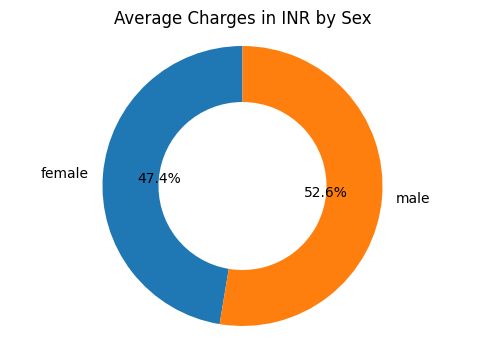

In [37]:
plt.figure(figsize=(6, 4))
plt.pie(sex_df, labels=sex_df.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.title('Average Charges in INR by Sex')
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

## Observation : The gender is not a constraint for the company to give a policy or not since nearly equal number of policies have been handed out to both the genders.

- However, a slight difference can be seen in terms of cost incurred by calculating the mean cost for both sexes.

Female - 12569.578844

Male - 13956.751178

Making the medical policy for men 11.03% more expensive than women.

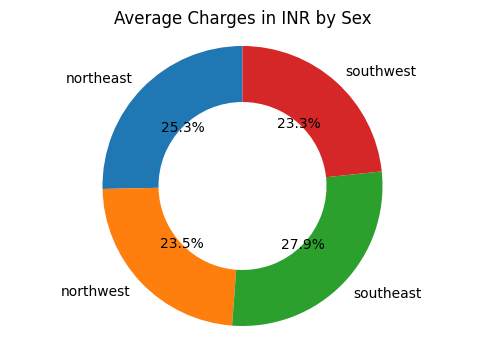

In [33]:
plt.figure(figsize=(6, 4))
plt.pie(region, labels=region.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.title('Average Charges in INR by Sex')
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

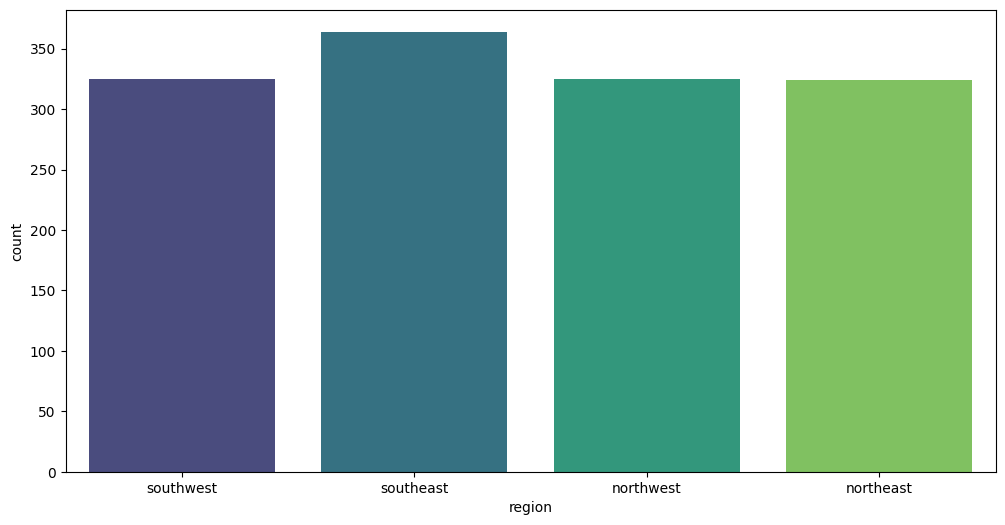

In [47]:
sns.countplot(data=merge,x='region',palette='viridis')
plt.show()

###Observation
The above data concludes that the most policies are bought from the southeast region but even then, the difference is not considerably huge.

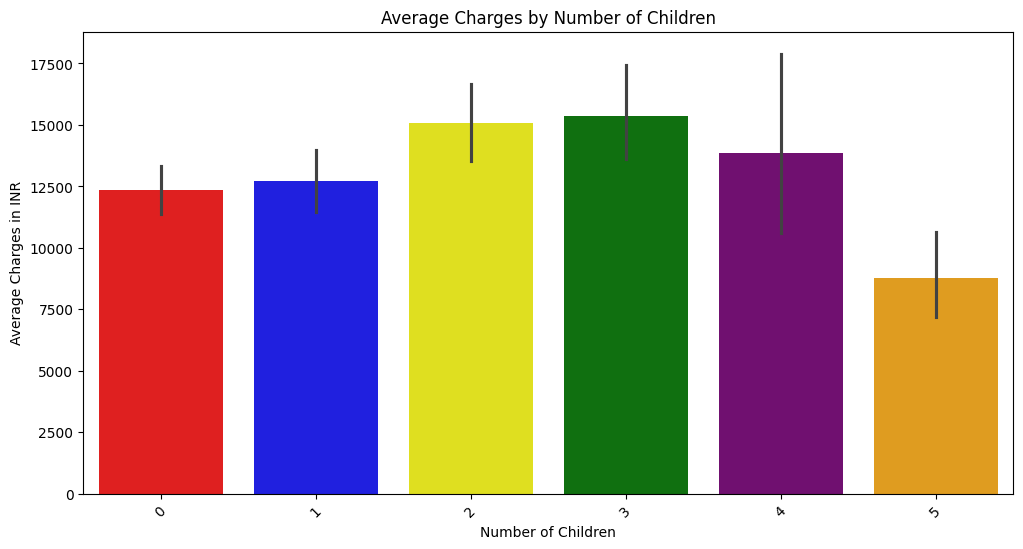

In [48]:
plt.rcParams['figure.figsize'] = (12,6)
sns.barplot(x = 'children', y = 'charges in INR', data = merge, palette=['red', 'blue', 'yellow', 'green', 'purple', 'orange'])
plt.xlabel('Number of Children')
plt.ylabel('Average Charges in INR')
plt.title('Average Charges by Number of Children')
plt.xticks(rotation=45)
plt.show()



##Observation : The data doe not tell us the amount claimed by the individuals. though we can infer a subtitle increase in the charges in INR with increasing children but that starts to fall after the number of children crosses 3.
Thus the info is not sufficient for us to make deductions about the calculation of the amount of claim.

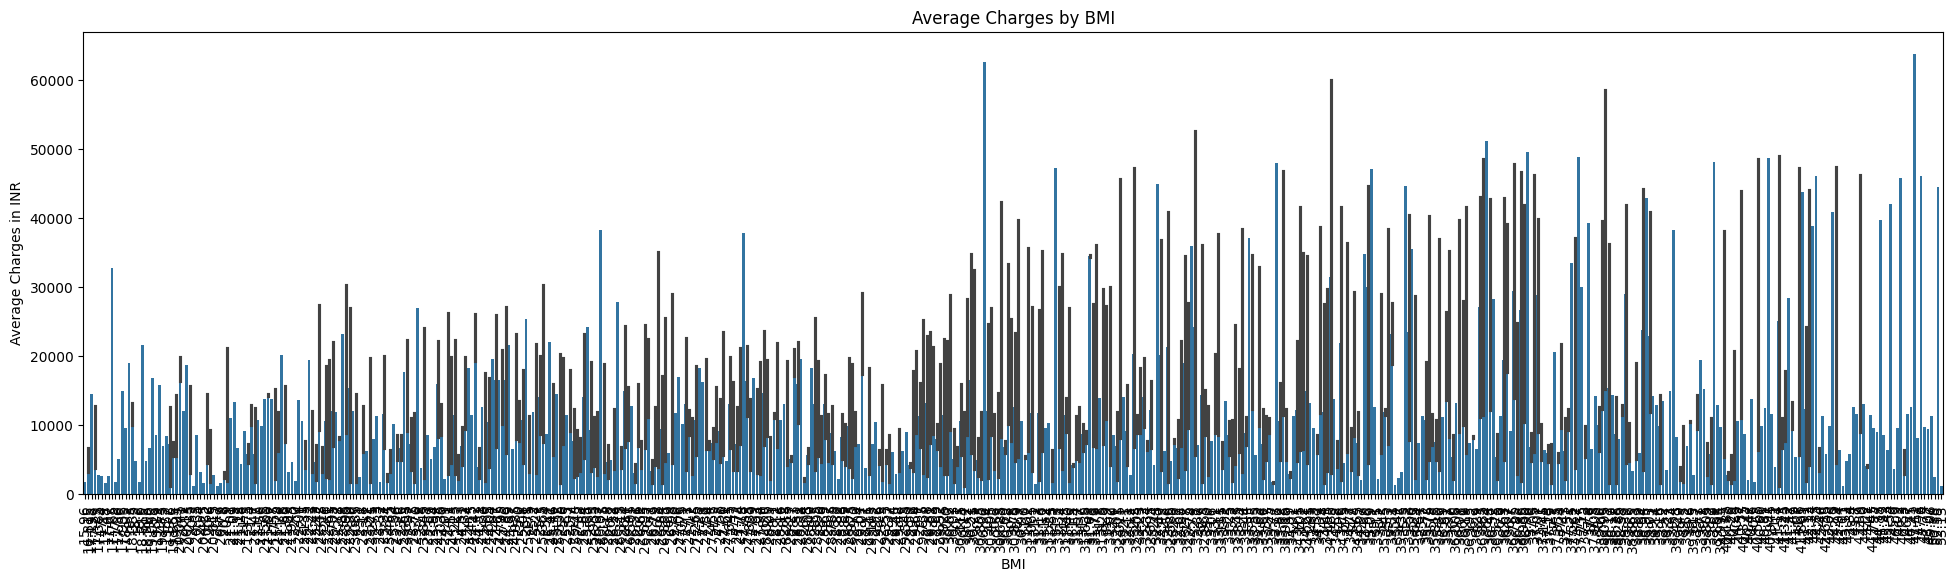

In [52]:
plt.rcParams['figure.figsize'] = (24,6)
sns.barplot(x = 'bmi', y = 'charges in INR', data = merge)
plt.xlabel('BMI')
plt.ylabel('Average Charges in INR')
plt.title('Average Charges by BMI')
plt.xticks(rotation=90)
plt.show()

### Observation: Though we cant conclude a rigid, linear trend but on the larger scale, it seems that the cost incurred increases with the bmi, this happend with the exception of a few dips probably where bmi falls in the cateogory : healthy weight.

#Unhealthy person will be having high charges in INR.

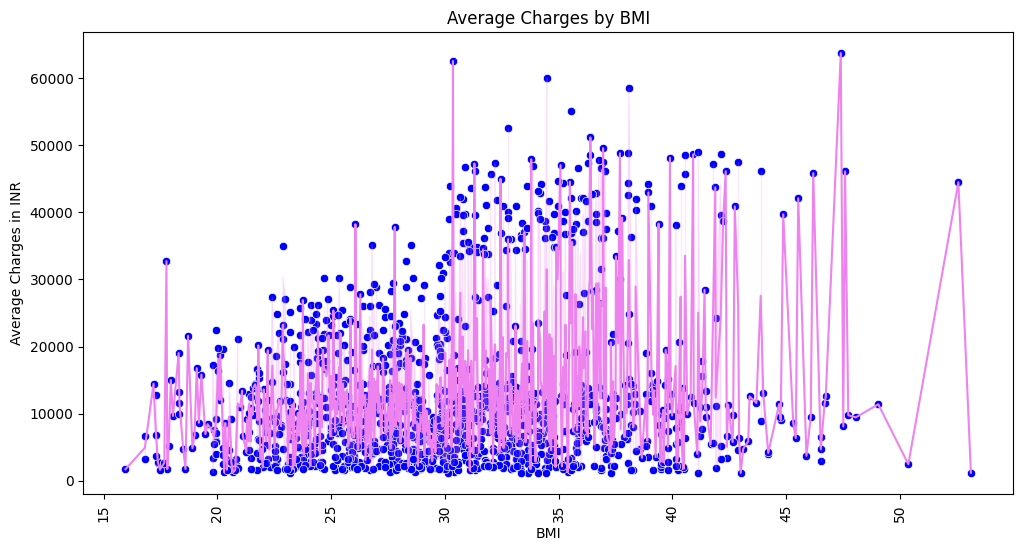

In [57]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='bmi', y='charges in INR', data=merge, marker='o', color='blue')
sns.lineplot(x='bmi', y='charges in INR', data=merge, color='violet')
plt.xlabel('BMI')
plt.ylabel('Average Charges in INR')
plt.title('Average Charges by BMI')
plt.xticks(rotation=90)
plt.show()

## 6. Is it needed for the company to understand whether the person covered is a smoker or a non-smoker

In [58]:
merge['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


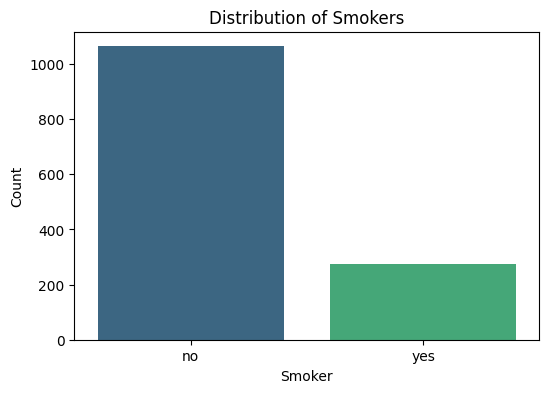

In [62]:
plt.figure(figsize=(6, 4))
sns.countplot(data=merge, x='smoker', palette='viridis')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Distribution of Smokers')
plt.show()

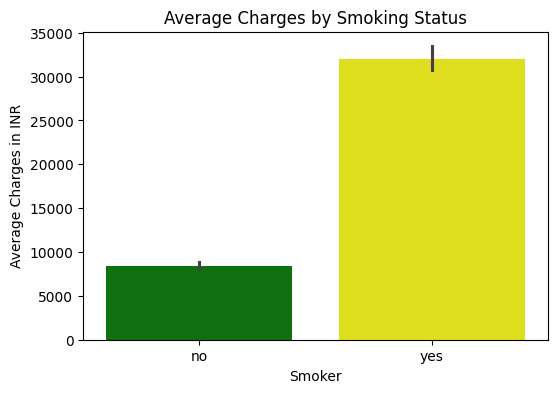

In [76]:
plt.figure(figsize=(6,4))
sns.barplot(x='smoker',y='charges in INR',data=merge,palette=['green','yellow'])
plt.xlabel('Smoker')
plt.ylabel('Average Charges in INR')
plt.title('Average Charges by Smoking Status')
plt.show()

In [78]:
merge.groupby('smoker')['charges in INR'].mean()

,charges in INR
smoker,
no,8434.268298
yes,32050.231832


### Observation:
Only 20.4% users are smokers in the given data.
Most of the people who bought the policy are no-smokers.
also, on an average a smoker pays: > 32050.23rs
whereas non-smoker only pays - > 8434.2682rs
this means a non-smoker on an average only has to pay 26.31% of what a smoker pays for the same policy.

## **Machine Learning**

In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [80]:
# Encode categorical features
le = LabelEncoder()
merge['sex'] = le.fit_transform(merge['sex'])
merge['smoker'] = le.fit_transform(merge['smoker'])
merge['region'] = le.fit_transform(merge['region'])

In [83]:
# Define features and target variable for linear regression
X_train = merge[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y_train = merge['charges in INR']


In [84]:
# Split data into training and testing sets for linear regression
X_train, X_test, y_train, y_test = train_test_split( X_train, y_train, test_size=0.2, random_state=42)

In [85]:
# Train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [86]:
# Make predictions and evaluate the model
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [87]:
print("Linear Regression Model:")
print("Mean Squared Error:", mse_linear)
print("R-squared:", r2_linear)


Linear Regression Model:
Mean Squared Error: 38219130.56418839
R-squared: 0.7310354872877263


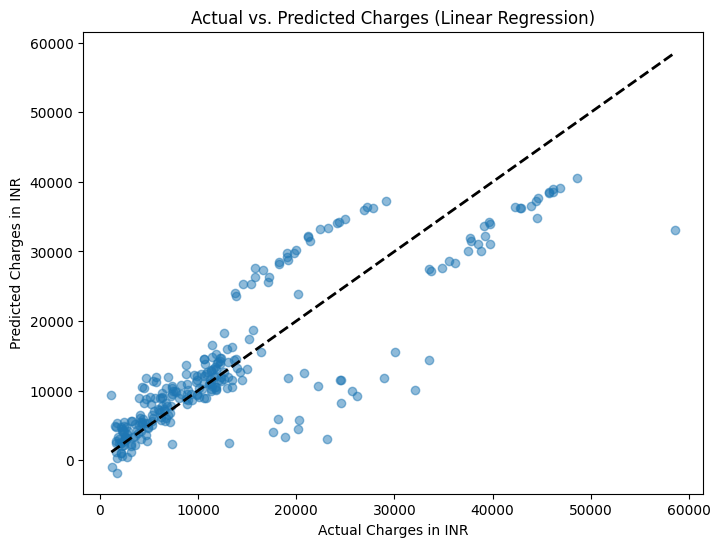

In [88]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Charges in INR')
plt.ylabel('Predicted Charges in INR')
plt.title('Actual vs. Predicted Charges (Linear Regression)')
plt.show()

In [98]:
models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "SVM": SVR(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear Regression": LinearRegression()
}

results = {}

In [99]:
for model_name, model in models.items():
  try:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {"MAE": mae, "MSE": mse, "R2": r2}

    if model_name == "Logistic Regression":
      accuracy = accuracy_score(y_test, y_pred.round())
      precision = precision_score(y_test, y_pred.round(), average='weighted')
      recall = recall_score(y_test, y_pred.round(), average='weighted')
      f1 = f1_score(y_test, y_pred.round(), average='weighted')
      results[model_name]["Accuracy"] = accuracy
      results[model_name]["Precision"] = precision
      results[model_name]["Recall"] = recall
      results[model_name]["F1-Score"] = f1
      print(classification_report(y_test, y_pred.round()))
      print(confusion_matrix(y_test, y_pred.round()))

  except Exception as e:
    print(f"Error training {model_name}: {e}")

for model_name, metrics in results.items():
  print(f"\n{model_name} Model Metrics:")
  for metric_name, value in metrics.items():
    print(f"{metric_name}: {value}")

Error training Logistic Regression: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

Random Forest Model Metrics:
MAE: 2574.219731957712
MSE: 22528684.90492928
R2: 0.8414559235635679

Decision Tree Model Metrics:
MAE: 2844.2233870858213
MSE: 36904311.28885005
R2: 0.7402884378513752

SVM Model Metrics:
MAE: 8375.834796529005
MSE: 161006600.2462876
R2: -0.13307291765762375

Linear Regression Model Metrics:
MAE: 4205.371798308629
MSE: 38219130.56418839
R2: 0.7310354872877263


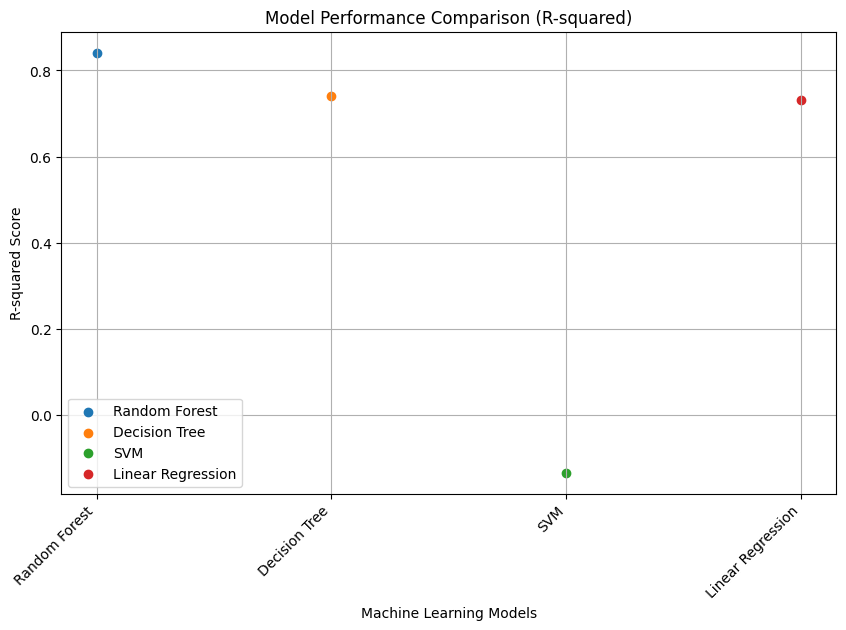

In [100]:
plt.figure(figsize=(10, 6))

for model_name, metrics in results.items():
  if "R2" in metrics:  # Make sure R2 score exists for the model
    plt.scatter(model_name, metrics["R2"], label=model_name)

plt.xlabel("Machine Learning Models")
plt.ylabel("R-squared Score")
plt.title("Model Performance Comparison (R-squared)")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.show()

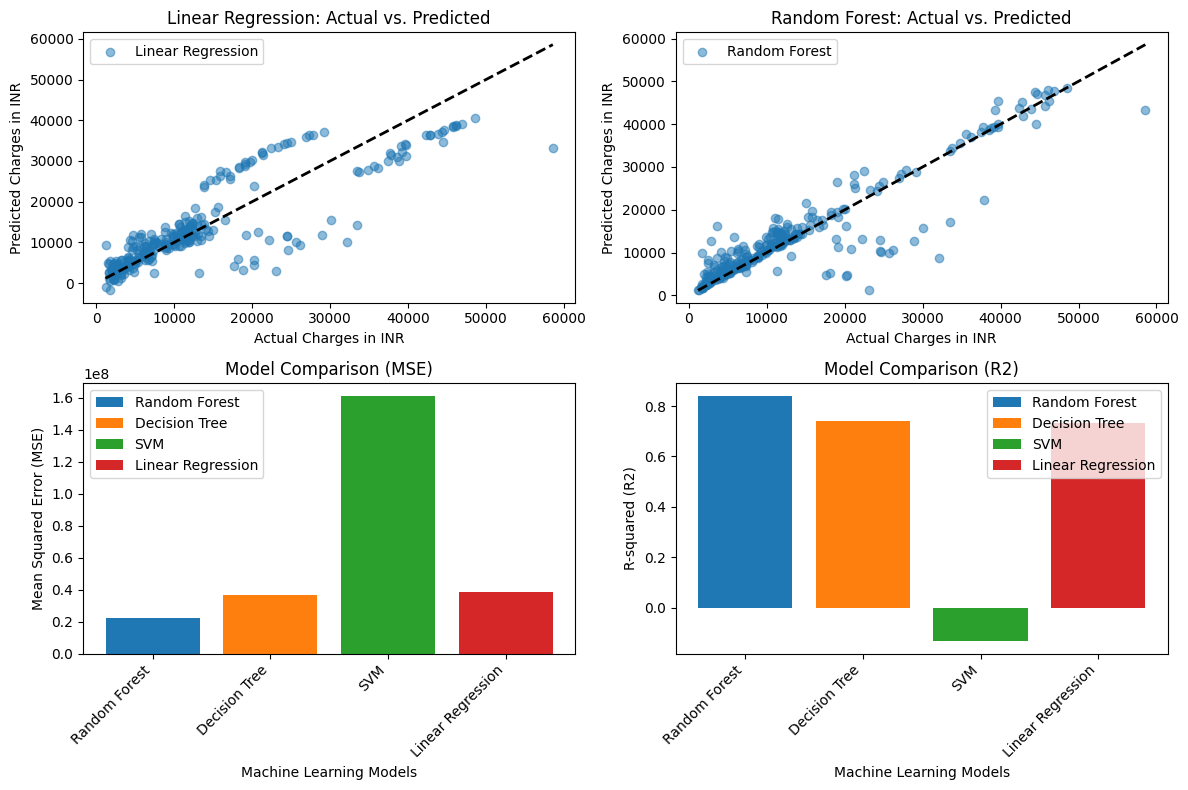

In [109]:
plt.figure(figsize=(12, 8))

# Plot scatter plots for the best-fitting models (e.g., Random Forest and Linear Regression)
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5, label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Charges in INR')
plt.ylabel('Predicted Charges in INR')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()

y_pred_rf = models["Random Forest"].predict(X_test)
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Charges in INR')
plt.ylabel('Predicted Charges in INR')
plt.title('Random Forest: Actual vs. Predicted')
plt.legend()

# Plot error metrics comparison for all models
plt.subplot(2, 2, 3)
for model_name, metrics in results.items():
  if "MSE" in metrics:
    plt.bar(model_name, metrics["MSE"], label=model_name)
plt.xlabel("Machine Learning Models")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Model Comparison (MSE)")
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.subplot(2, 2, 4)
for model_name, metrics in results.items():
  if "R2" in metrics:
    plt.bar(model_name, metrics["R2"], label=model_name)
plt.xlabel("Machine Learning Models")
plt.ylabel("R-squared (R2)")
plt.title("Model Comparison (R2)")
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()


In [111]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [112]:
X_cluster = merge[['age', 'bmi', 'children', 'charges in INR']]
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

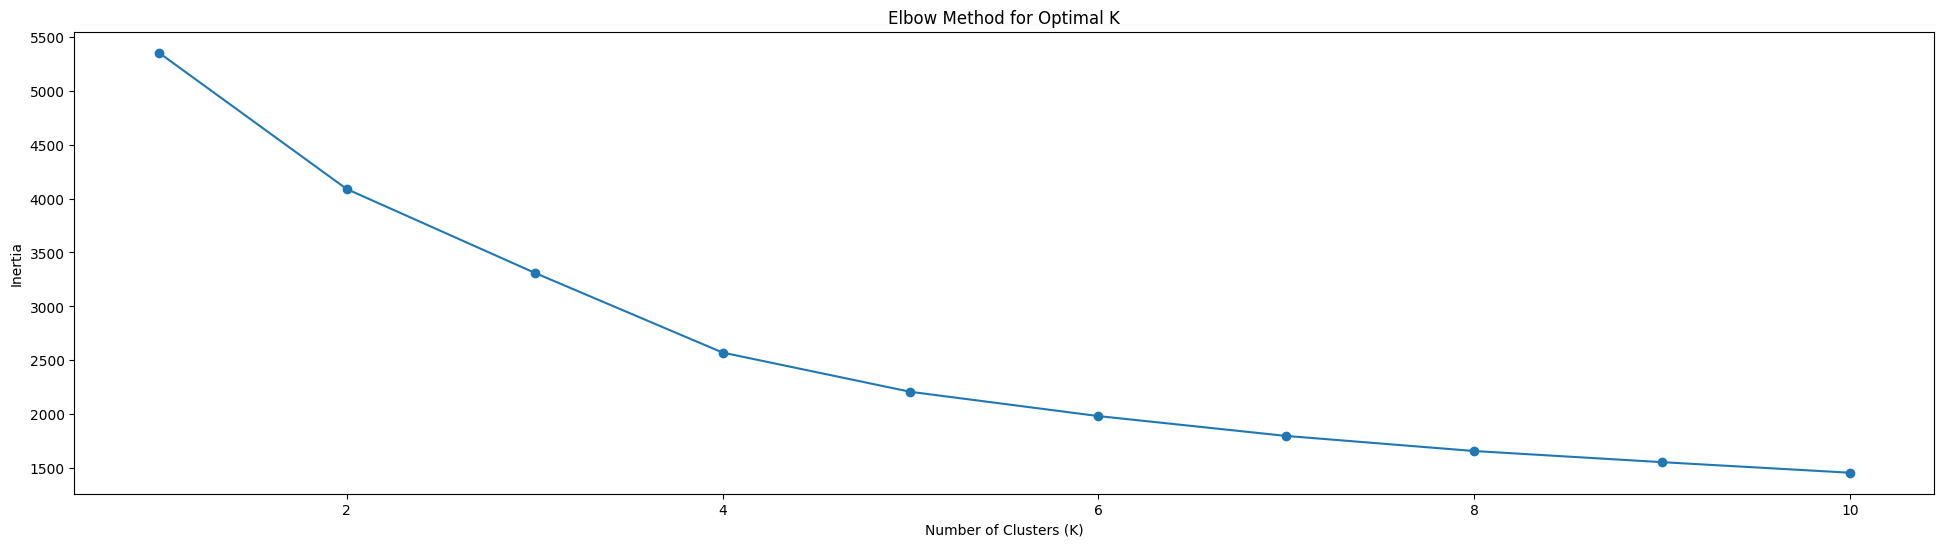

In [113]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_cluster_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [114]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
merge['cluster'] = kmeans.fit_predict(X_cluster_scaled)

for i in range(n_clusters):
    print(f"\nCluster {i}:")
    print(merge[merge['cluster'] == i].describe())



Cluster 0:
        children      smoker      region         age         sex         bmi  \
count  596.00000  596.000000  596.000000  596.000000  596.000000  596.000000   
mean     1.02349    0.110738    1.473154   27.234899    0.494966   28.831359   
std      1.20061    0.314071    1.100474    7.034502    0.500395    5.813190   
min      0.00000    0.000000    0.000000   18.000000    0.000000   15.960000   
25%      0.00000    0.000000    1.000000   21.000000    0.000000   24.603750   
50%      1.00000    0.000000    1.000000   27.000000    0.000000   28.447500   
75%      2.00000    0.000000    2.000000   33.000000    1.000000   32.606250   
max      5.00000    1.000000    3.000000   46.000000    1.000000   53.130000   

       charges in INR  cluster  
count      596.000000    596.0  
mean      6418.677885      0.0  
std       5925.102802      0.0  
min       1121.873900      0.0  
25%       2496.284225      0.0  
50%       4395.691500      0.0  
75%       6564.679837      0.0  
max

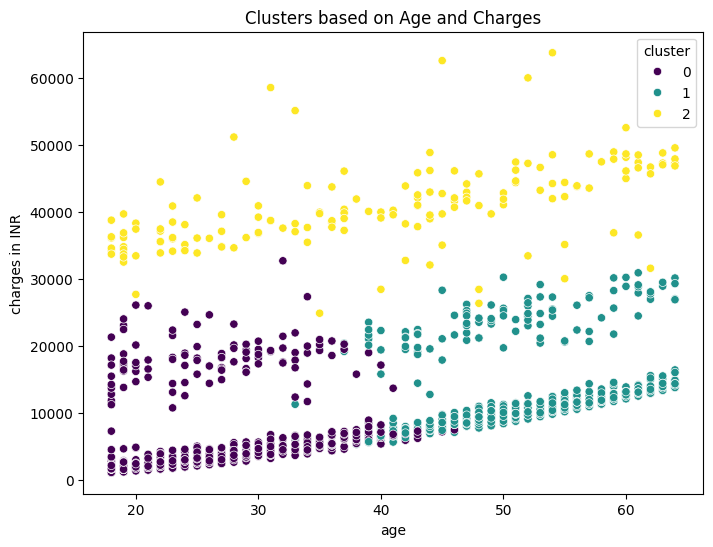

In [120]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges in INR', hue='cluster', data=merge, palette='viridis')
plt.title('Clusters based on Age and Charges')
plt.show()


## Deep learning and NLP processing

In [128]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [129]:
merge['region'] = merge['region'].astype(str)
texts = merge['region'].tolist()
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [130]:
y = merge['charges in INR']
X_train_nlp, X_test_nlp, y_train_nlp, y_test_nlp = train_test_split(
    padded_sequences, y, test_size=0.2, random_state=42)


In [131]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

model_nlp = Sequential()
model_nlp.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model_nlp.add(LSTM(128))
model_nlp.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [133]:
model_nlp.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_nlp.fit(X_train_nlp, y_train_nlp, epochs=10, batch_size=32, validation_split=0.2)
loss, mae = model_nlp.evaluate(X_test_nlp, y_test_nlp)
print(f"Mean Squared Error: {loss}")
print(f"Mean Absolute Error: {mae}")
y_pred_nlp = model_nlp.predict(X_test_nlp)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 316904704.0000 - mae: 12977.9248 - val_loss: 343743680.0000 - val_mae: 13586.9893
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 301338464.0000 - mae: 12629.0996 - val_loss: 343671104.0000 - val_mae: 13584.3193
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 333915552.0000 - mae: 13375.3916 - val_loss: 343598880.0000 - val_mae: 13581.6602
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 303227136.0000 - mae: 12937.7383 - val_loss: 343528192.0000 - val_mae: 13579.0557
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 296639424.0000 - mae: 12508.8535 - val_loss: 343456384.0000 - val_mae: 13576.4131
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 348899200.0000 - mae: 13705.0977 - val_loss: 343384288.0000 - val_mae: 13573.7578
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 325097952.0000 - mae: 13173.6816 - val_loss: 343313184.0000 - val_mae: 13571.1367
Epoch 8/10
27/27 ━━